In [15]:
import json
import os
import random
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [16]:
curr_dir = os.getcwd()

voc_root = os.path.join(curr_dir, "VOCtrainval_11-May-2012", "VOCdevkit", "VOC2012")

if not os.path.isdir(voc_root):
    raise RuntimeError("VOC Directory is wrong")

splits_dir = os.path.join(voc_root, "ImageSets", "Segmentation")


splits_f = os.path.join(splits_dir, "{}.txt".format("train"))


with open(os.path.join(splits_f)) as f:
    file_names = [x.strip() for x in f.readlines()]

class_dir = os.path.join(voc_root, "SegmentationClass")
obj_dir = os.path.join(voc_root, "SegmentationObject")

images = [os.path.join(class_dir, x + ".png") for x in file_names]
masks = [os.path.join(obj_dir, x + ".png") for x in file_names]

In [17]:
palette = {
    0:  (0, 0, 0, 255),         # Black
    1:  (255, 0, 0, 255),       # Red
    2:  (0, 255, 0, 255),       # Green
    3:  (0, 0, 255, 255),       # Blue
    4:  (255, 255, 0, 255),     # Yellow
    5:  (0, 255, 255, 255),     # Cyan
    6:  (255, 0, 255, 255),     # Magenta
    7:  (128, 0, 0, 255),       # Maroon
    8:  (0, 128, 0, 255),       # Dark green
    9:  (0, 0, 128, 255),       # Navy
    10: (128, 128, 0, 255),     # Olive
    11: (0, 128, 128, 255),     # Teal
    12: (192, 192, 192, 255),   # Silver
    13: (128, 128, 128, 255),   # Gray
    14: (0, 192, 192, 255),     # Turquoise
    15: (192, 0, 192, 255),     # Fuchsia
    16: (192, 64, 0, 255),      # Red-orange
    17: (192, 192, 0, 255),     # Gold
    18: (0, 64, 128, 255),      # Darker navy
    19: (64, 128, 64, 255),     # Mid-green
    20: (192, 128, 64, 255),    # Tan
    255: (255, 255, 255, 255),  # White
}

classes = ['background','aeroplane','bicycle','bird', 'boat','bottle','bus','car','cat','chair',
           'cow','diningtable','dog','horse','motorbike','person','pottedplant','sheep',
           'sofa','train','tvmonitor', 'ambiguous']

def apply_palette(image, palette):
    # Create an empty RGB image with the same height and width as the input
    rgb_image = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            class_index = image[i, j]
            rgb_values = palette[class_index]
            rgb_image[i, j, :] = rgb_values

    return rgb_image

In [18]:
# for x in file_names:
#     points_file = []
#     output_path = "voc_points/{}_points.json".format(x)
#     # print("image is ", x)
#     class_mask_dir = os.path.join(class_dir, x + ".png")
#     class_mask = Image.open(class_mask_dir)
#     class_mask_arr = np.array(class_mask)
#     obj_mask_dir = os.path.join(obj_dir, x + ".png")
#     imgP = Image.open(obj_mask_dir)
#     imgPArr = np.array(imgP)
#     # print(np.unique(imgPArr))
#     for unique in np.unique(imgPArr):
#         if unique == 255 or unique == 0:
#             continue
#         # print(unique)
        
#         ys, xs = np.where(imgPArr == unique)

#         N = 3 # number of points to sample
#         sampled_indices = np.random.choice(len(xs), N, replace=False)
#         sampled_points = list(zip(xs[sampled_indices], ys[sampled_indices]))
#         points_list = [[int(s) for s in sublist] for sublist in sampled_points] 

#         # print(sampled_points)
#         cat_index = int(class_mask_arr[points_list[0][1]][points_list[0][0]])
#         print(cat_index)
#         cat = classes[cat_index]
#         # print(cat)

#         segpoints = {"filename": x, "category": cat, "sampled_points": points_list, "cat_id": cat_index}
#         print(segpoints)
#         points_file.append(segpoints)
    

    # img_paletted = apply_palette(imgPArr, palette)
    # plt.imshow(img_paletted)

    # try:
    #     with open(output_path, "w") as output_file:
    #         json.dump(sorted_polys, output_file)
    #     print("File {} has been created.".format(ann_image[0]["file_name"][:-4]))
    # except Exception as e:
    #     print(
    #         f"Error occurred while writing to {ann_image[0]['file_name'][:-4]}: {str(e)}"
    #     )




    # print(points_file)
    # try:
    #     with open(output_path, "w") as output_file:
    #         json.dump(points_file, output_file)
    #     print("File for image {} has been created.".format(x))
    # except Exception as e:
    #     print(
    #         f"Error occurred while writing file for {x}: {str(e)}"
    #     )



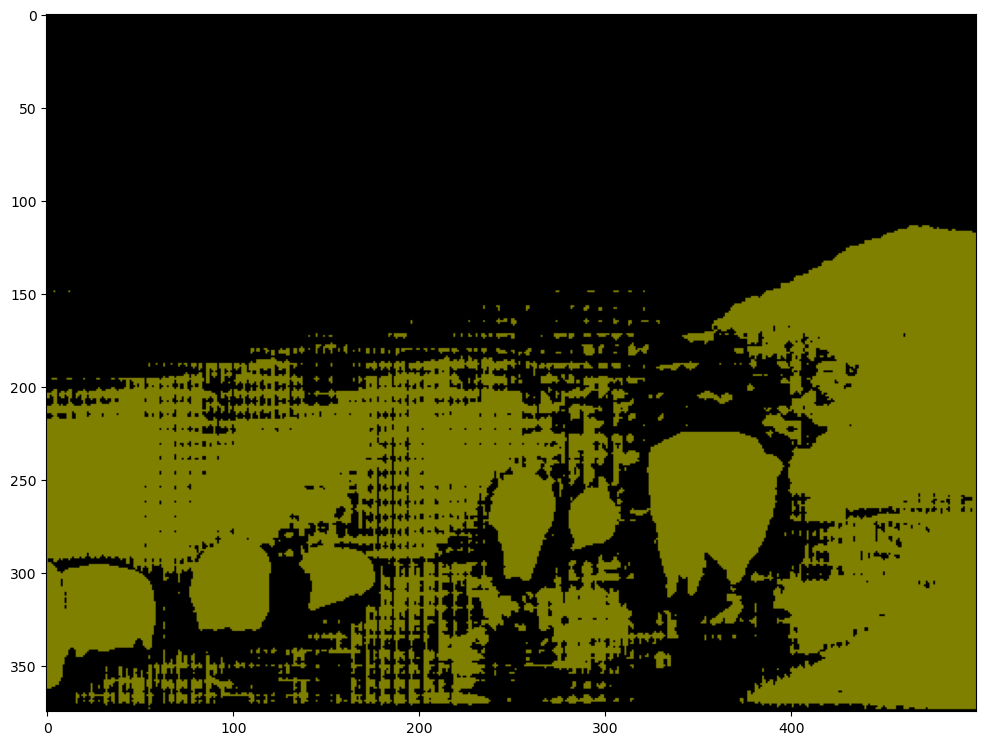

In [34]:
base = Image.open("VOCtrainval_11-May-2012/VOCdevkit/VOC2012/JPEGImages/2011_002873.jpg")
mask = np.array(Image.open("/home/youxiang/Desktop/FYP/WSSS_method/voc_pseudomasks_SAM/2011_002873.png"))
mask_dino = np.array(Image.open("/home/youxiang/Desktop/FYP/WSSS_method/voc_pseudomasks_Gdino_SAM/2011_002873.png"))
# mask_overlay = np.array(Image.open("voc_pseudomasks_SAM/2008_006920.png"))
mask_overlay_img = apply_palette(mask, palette)
mask_overlay_img_dino = apply_palette(mask_dino, palette)
mask_img = Image.fromarray(mask_overlay_img)
mask_img_dino = Image.fromarray(mask_overlay_img_dino)
base.save("Mask_visualizations/2011_002873_base.png")
mask_img.save("Mask_visualizations/2011_002873_mask.png")
mask_img_dino.save("Mask_visualizations/2011_002873_original_mask.png")
# mask_overlay_img = Image.fromarray(mask_overlay_img)
# base.paste(mask_overlay_img, (0, 0), mask_overlay_img)
# overlayed = Image.blend(base, mask_overlay, 0.6)
plt.figure(figsize=[12, 12])
plt.imshow(mask_img)
# mask_img.save("Mask_visualizations/2010_003157_masks.png")

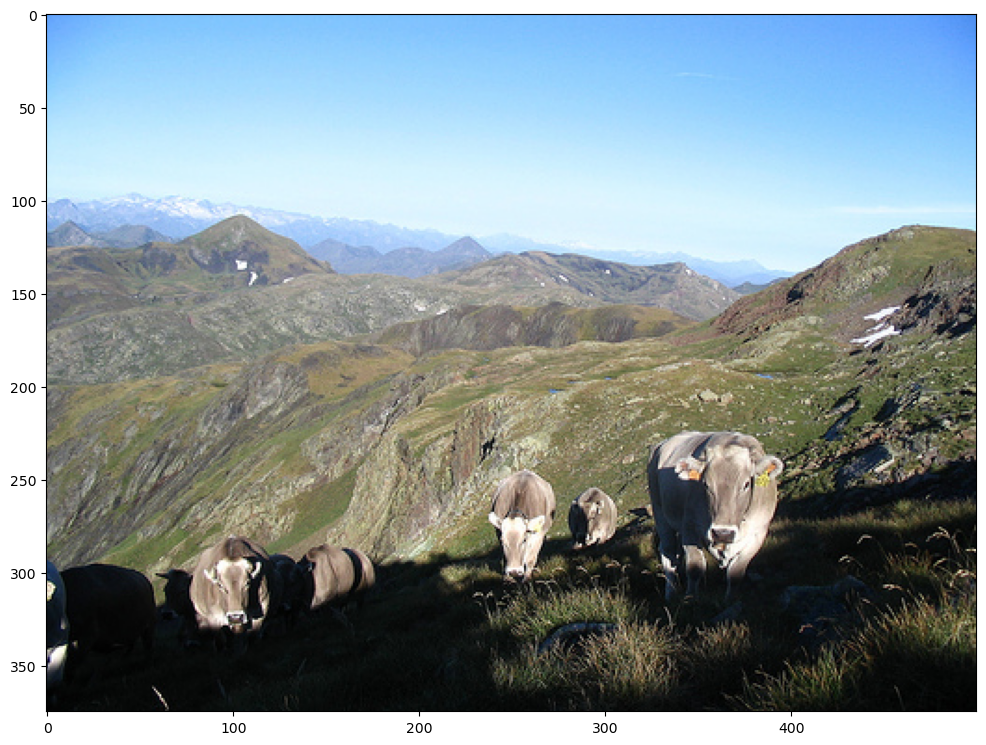

In [35]:
plt.figure(figsize=[12, 12])
plt.imshow(base)

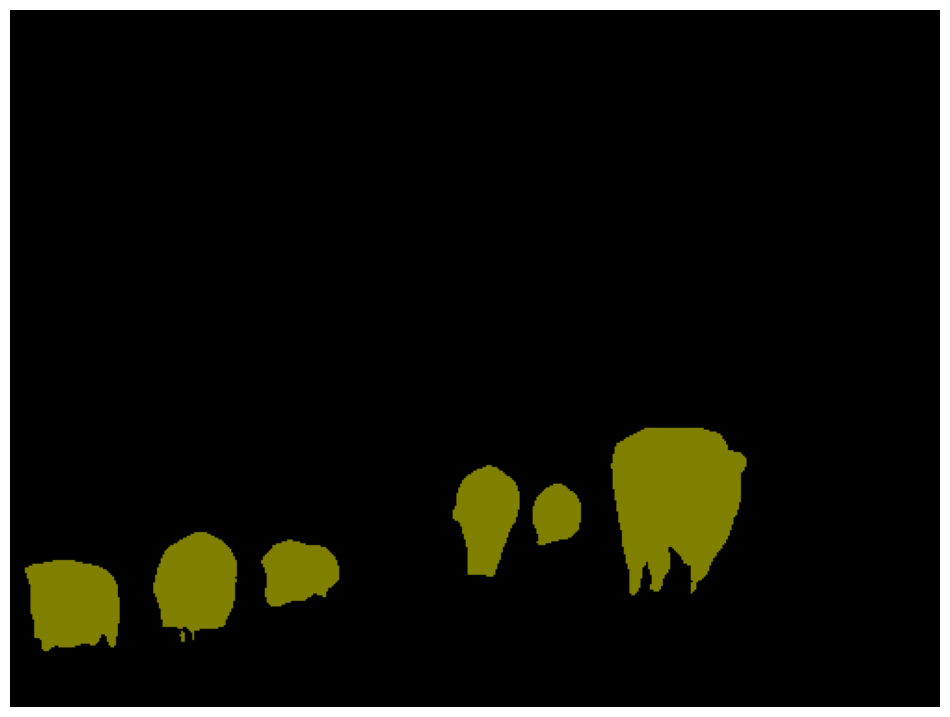

In [36]:
plt.figure(figsize=[12, 12])
plt.axis('off')
plt.imshow(mask_img_dino)